# My project
life expectancy

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
spark = SparkSession.builder.appName('basics').getOrCreate()

In [2]:
#dataSet = spark.read.format("csv").option("header", "true").load('LifeExpectancyData.csv')
dataSet = spark.read.csv('LifeExpectancyData.csv', header=True, inferSchema=True)


In [3]:
dataSet.printSchema()
print(dataSet.columns)
pd.DataFrame(dataSet.take(5), columns=dataSet.columns)

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)

['Country', 'Ye

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


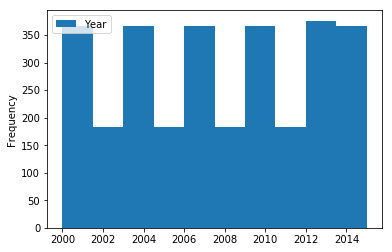

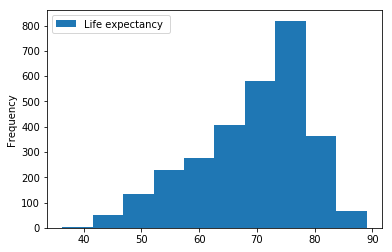

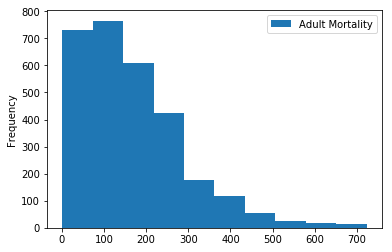

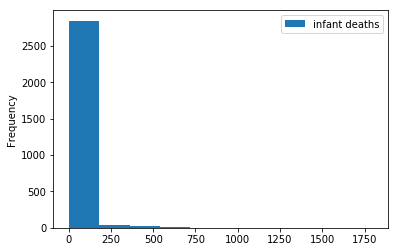

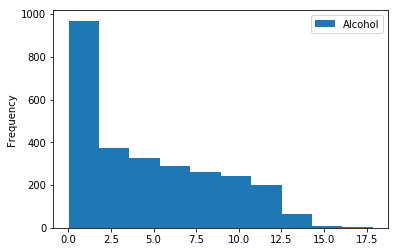

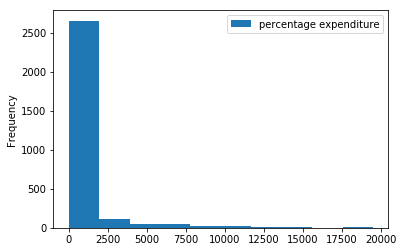

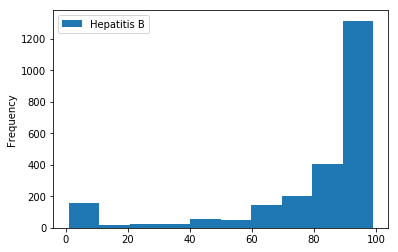

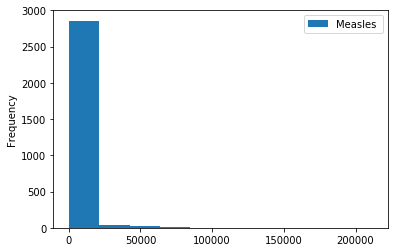

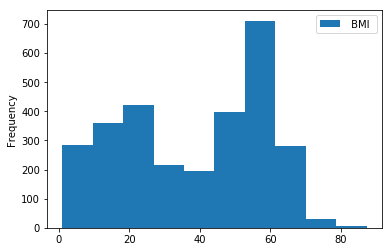

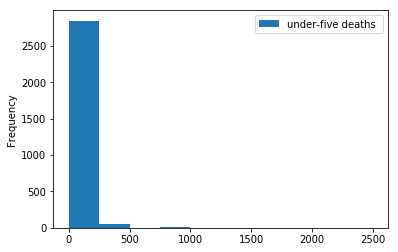

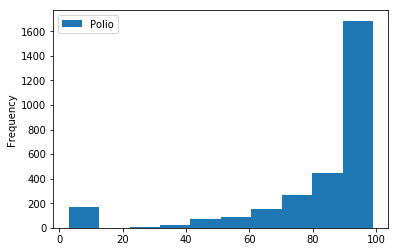

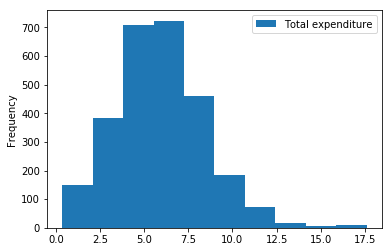

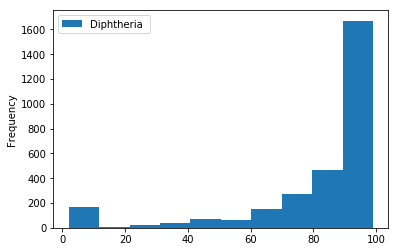

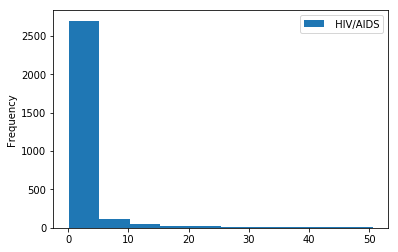

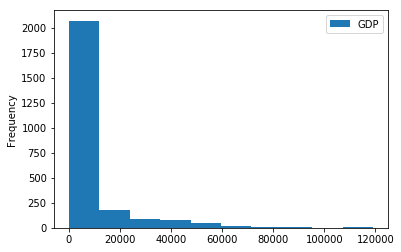

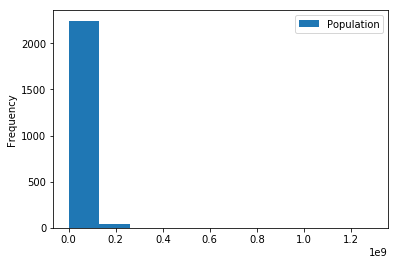

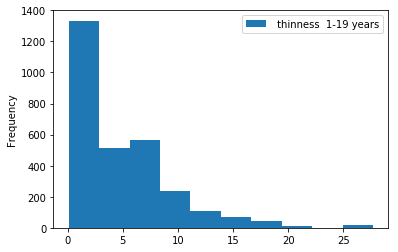

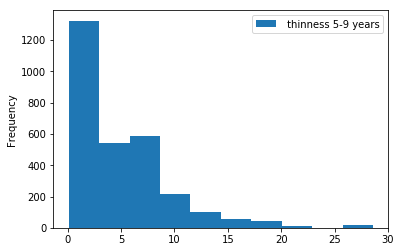

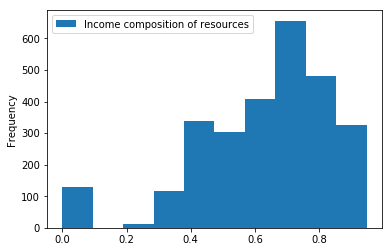

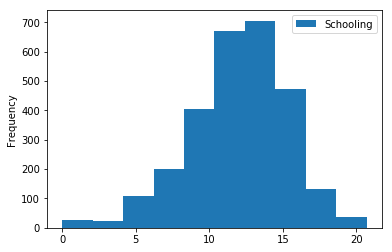

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

numeric_features = [t[0] for t in dataSet.dtypes if t[1] == 'int' or t[1] == 'double']

for i in numeric_features:
    pd.DataFrame(dataSet.select(i).collect(), columns=[i]).plot(kind='hist')


,Status,count
0,Developed,512
1,Developing,2426


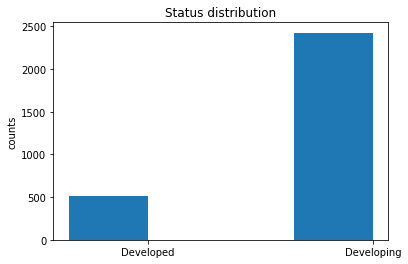

In [5]:
responses = dataSet.groupBy('Status').count().collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width)
 
plt.ylabel('counts')
plt.title('Status distribution')
plt.xticks(ind + width/2., categories)
dataSet.groupby('Status').count().toPandas()

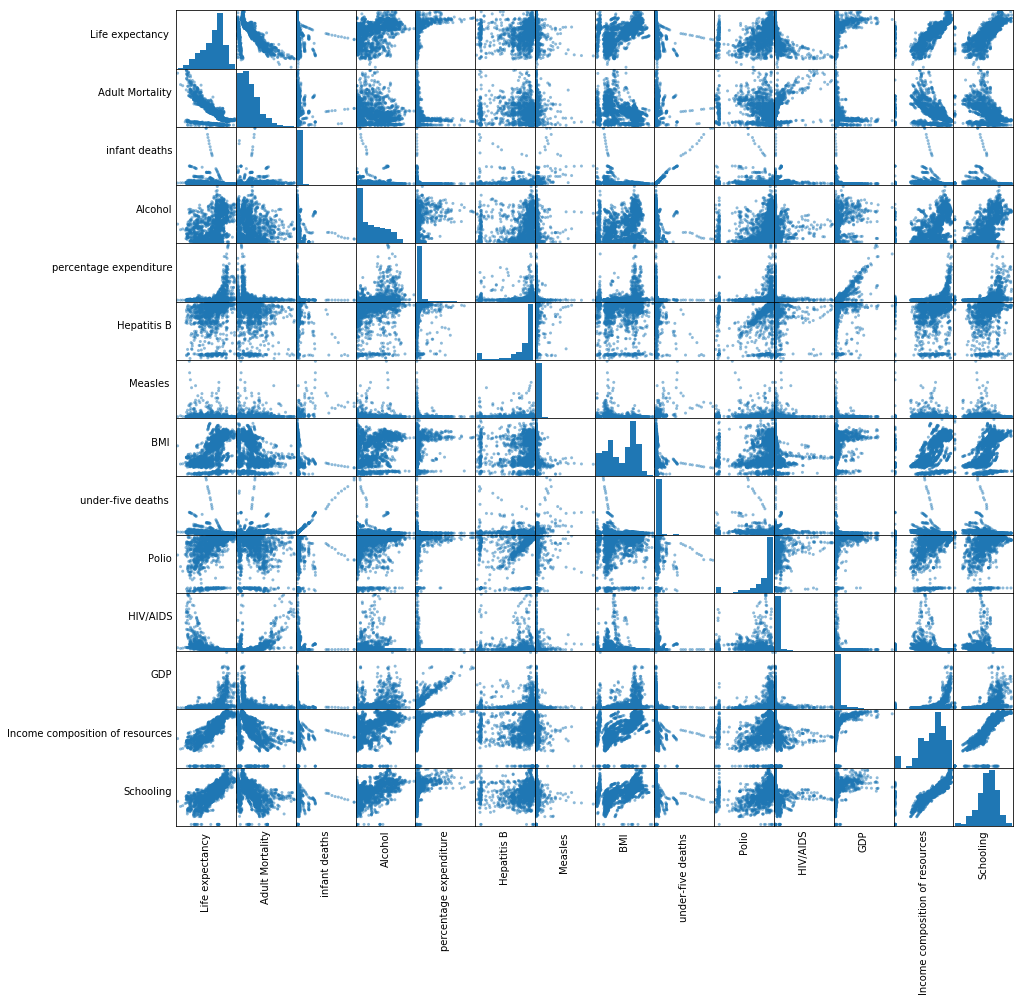

In [6]:
numeric_features = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', ' HIV/AIDS', 'GDP', 'Income composition of resources', 'Schooling']
#numeric_features = [t[0] for t in dataSet.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = dataSet.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(15, 15))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [7]:
(dataSet.describe()).toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
Country,2938,None,None,Afghanistan,Zimbabwe
Year,2938,2007.5187202178352,4.613840940258099,2000,2015
Status,2938,None,None,Developed,Developing
Life expectancy,2928,69.22493169398912,9.523867487824305,36.3,89.0
Adult Mortality,2928,164.79644808743168,124.2920790034219,1,723
infant deaths,2938,30.303948264125257,117.92650131339906,0,1800
Alcohol,2744,4.6028607871720375,4.052412658755658,0.01,17.87
percentage expenditure,2938,738.2512954533823,1987.914858016194,0.0,19479.91161
Hepatitis B,2385,80.94046121593291,25.070015593018063,1,99


In [8]:
data_count = (dataSet.describe()).toPandas().loc[0]
columns_to_drop =[column for column in dataSet.columns if int(data_count[column]) < 2700]
print(columns_to_drop)

data_clean = dataSet.select([column for column in dataSet.columns if column not in columns_to_drop])  

(data_clean.describe()).toPandas().T

columns_to_drop = ['Country', 'Year']

data_clean = data_clean.select([column for column in data_clean.columns if column not in columns_to_drop])  

(data_clean.describe()).toPandas().T

['Hepatitis B', 'GDP', 'Population']


,0,1,2,3,4
summary,count,mean,stddev,min,max
Status,2938,None,None,Developed,Developing
Life expectancy,2928,69.22493169398912,9.523867487824305,36.3,89.0
Adult Mortality,2928,164.79644808743168,124.2920790034219,1,723
infant deaths,2938,30.303948264125257,117.92650131339906,0,1800
Alcohol,2744,4.6028607871720375,4.052412658755658,0.01,17.87
percentage expenditure,2938,738.2512954533823,1987.914858016194,0.0,19479.91161
Measles,2938,2419.5922396187884,11467.27248923461,0,212183
BMI,2904,38.32124655647373,20.044033502562083,1.0,87.3
under-five deaths,2938,42.0357385976855,160.4455484057337,0,2500


In [9]:
data_clean = data_clean.na.drop(how='any')
(data_clean.describe()).toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
Status,2556,None,None,Developed,Developing
Life expectancy,2556,69.32390453834121,9.39797099792142,36.3,89.0
Adult Mortality,2556,162.34154929577466,124.22806945176372,1,723
infant deaths,2556,29.721048513302033,123.16863228715037,0,1800
Alcohol,2556,4.554276212832573,4.0113854286443775,0.01,17.87
percentage expenditure,2556,846.8253388055201,2109.803753677765,0.0,19479.91161
Measles,2556,2253.75,10778.382963965705,0,212183
BMI,2556,38.2280907668231,19.755899048003094,1.0,77.1
under-five deaths,2556,41.168622848200314,167.71736583830173,0,2500


In [10]:
from pyspark.ml.feature import StringIndexer

status_indexer = StringIndexer(inputCol='Status',outputCol='StatusIndex')
mdata = status_indexer.fit(data_clean).transform(data_clean)
pd.DataFrame(mdata.take(110), columns=mdata.columns)

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,StatusIndex
0,Developing,65.0,263,62,0.01,71.279624,1154,19.1,83,6,8.16,65,0.1,17.2,17.3,0.479,10.1,0.0
1,Developing,59.9,271,64,0.01,73.523582,492,18.6,86,58,8.18,62,0.1,17.5,17.5,0.476,10.0,0.0
2,Developing,59.9,268,66,0.01,73.219243,430,18.1,89,62,8.13,64,0.1,17.7,17.7,0.470,9.9,0.0
3,Developing,59.5,272,69,0.01,78.184215,2787,17.6,93,67,8.52,67,0.1,17.9,18.0,0.463,9.8,0.0
4,Developing,59.2,275,71,0.01,7.097109,3013,17.2,97,68,7.87,68,0.1,18.2,18.2,0.454,9.5,0.0
5,Developing,58.8,279,74,0.01,79.679367,1989,16.7,102,66,9.20,66,0.1,18.4,18.4,0.448,9.2,0.0
6,Developing,58.6,281,77,0.01,56.762217,2861,16.2,106,63,9.42,63,0.1,18.6,18.7,0.434,8.9,0.0
7,Developing,58.1,287,80,0.03,25.873925,1599,15.7,110,64,8.33,64,0.1,18.8,18.9,0.433,8.7,0.0
8,Developing,57.5,295,82,0.02,10.910156,1141,15.2,113,63,6.73,63,0.1,19.0,19.1,0.415,8.4,0.0
9,Developing,57.3,295,84,0.03,17.171518,1990,14.7,116,58,7.43,58,0.1,19.2,19.3,0.405,8.1,0.0


In [11]:
data= mdata.drop('Status')
pd.DataFrame(data.take(5), columns=data.columns)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,StatusIndex
0,65.0,263,62,0.01,71.279624,1154,19.1,83,6,8.16,65,0.1,17.2,17.3,0.479,10.1,0.0
1,59.9,271,64,0.01,73.523582,492,18.6,86,58,8.18,62,0.1,17.5,17.5,0.476,10.0,0.0
2,59.9,268,66,0.01,73.219243,430,18.1,89,62,8.13,64,0.1,17.7,17.7,0.470,9.9,0.0
3,59.5,272,69,0.01,78.184215,2787,17.6,93,67,8.52,67,0.1,17.9,18.0,0.463,9.8,0.0
4,59.2,275,71,0.01,7.097109,3013,17.2,97,68,7.87,68,0.1,18.2,18.2,0.454,9.5,0.0


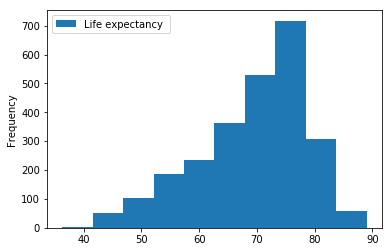

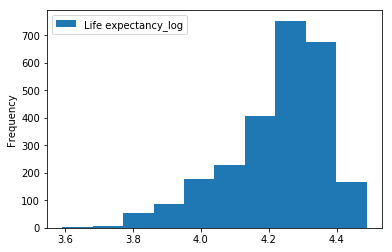

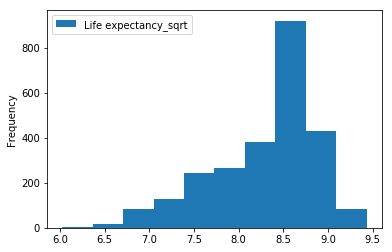

In [22]:
pd.DataFrame(data.select('Life expectancy ').collect(), columns=['Life expectancy ']).plot(kind='hist')
pd.DataFrame(data.select('Life expectancy ').collect(), columns=['Life expectancy_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('Life expectancy ').collect(), columns=['Life expectancy_sqrt']).transform(np.sqrt).plot(kind='hist')

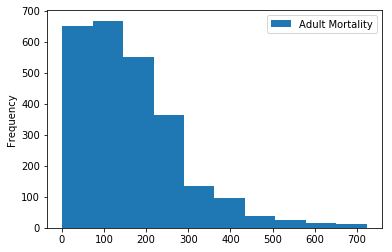

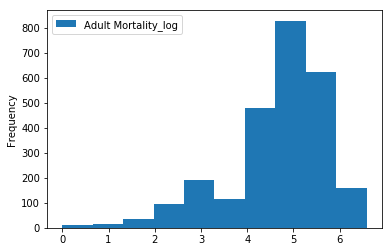

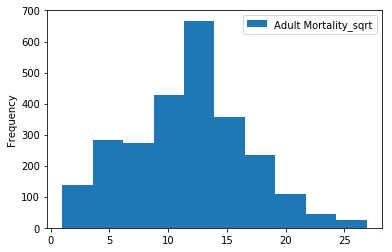

In [17]:
from pyspark.sql.functions import sqrt

pd.DataFrame(data.select('Adult Mortality').collect(), columns=['Adult Mortality']).plot(kind='hist')
pd.DataFrame(data.select('Adult Mortality').collect(), columns=['Adult Mortality_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('Adult Mortality').collect(), columns=['Adult Mortality_sqrt']).transform(np.sqrt).plot(kind='hist')

data_tf = data.withColumn('Adult Mortality', sqrt("Adult Mortality"))

In [18]:
print(data.columns)

['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'StatusIndex']


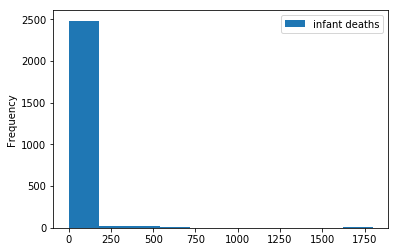

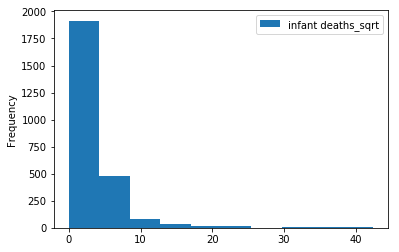

In [24]:
pd.DataFrame(data.select('infant deaths').collect(), columns=['infant deaths']).plot(kind='hist')
#pd.DataFrame(data.select('infant deaths').collect(), columns=['infant deaths_log']).transform(np.log).plot(kind='hist')
pd.DataFrame(data.select('infant deaths').collect(), columns=['infant deaths_sqrt']).transform(np.sqrt).plot(kind='hist')